* LSTM
* DeepLSTM
* BiDirectionalLSTM

# **LSTM**

## **Sentiment Analysis**

In [ ]:
# importing libraries

import keras
from keras.datasets import imdb
from keras import layers
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# loading the data

max_vocab = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_vocab)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
# padding
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=200)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000, 200)
(25000, 200)


In [ ]:
# model building

embedding_dim = 64

model = keras.Sequential([
    keras.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_vocab, output_dim=embedding_dim),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

In [ ]:
# training the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size = 64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7216 - loss: 0.5190 - val_accuracy: 0.8391 - val_loss: 0.3677
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9020 - loss: 0.2568 - val_accuracy: 0.8628 - val_loss: 0.3686
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9301 - loss: 0.1848 - val_accuracy: 0.8602 - val_loss: 0.3656
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9521 - loss: 0.1354 - val_accuracy: 0.8605 - val_loss: 0.4461
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9669 - loss: 0.0955 - val_accuracy: 0.8576 - val_loss: 0.4656
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9722 - loss: 0.0809 - val_accuracy: 0.8565 - val_loss: 0.4788


* We can observe that the model performance increased on test data nearly 86%
* Also the model is overfitting, so the overfitting reducing techniques can be applied

In [ ]:
# evalating test score on test set

test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.8602
Test Loss: 0.3656


Predictions by the LSTM model

In [ ]:
# on test sample

sample = 87
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction for 87th text: Positive
Origin al text label: Positive


In [ ]:
sample = 98
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction for 98th text: Negative
Origin al text label: Negative


In [ ]:
# predictions

word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3


def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]  # start token
    for word in tokens:
        encoded.append(word_index.get(word, 2))  # use <UNK> if not found
    return encoded

text = "Movie was bad"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Review: Movie was bad
Predicted probability: 0.22611344
Sentiment: Negative


In [ ]:
text = "Movie was good"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Review: Movie was good
Predicted probability: 0.60369414
Sentiment: Positive


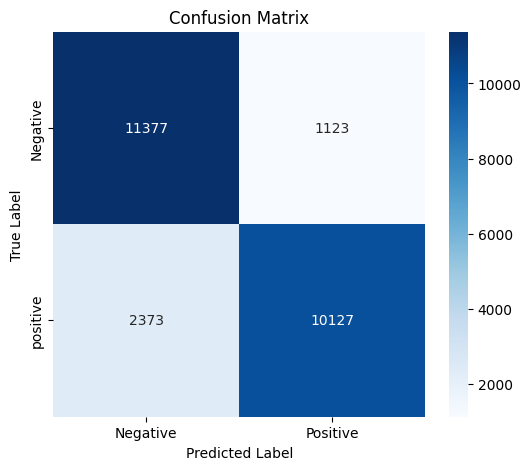

In [ ]:
# confusion matrix for the test data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

probs = model.predict(x_test, verbose=0)
y_pred = (probs > 0.5).astype(int).ravel()

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "positive"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **DeepLSTM**

## **Sentiment Analysis**

In [ ]:
# importing libraries

import keras
from keras.datasets import imdb
from keras import layers
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# loading the data

max_vocab = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_vocab)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
# padding
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000, 200)
(25000, 200)


In [ ]:
# model building

embedding_dim = 64

model = keras.Sequential([
    keras.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_vocab, output_dim=embedding_dim),
    layers.LSTM(128, return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(32),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 200, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 200, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 800,673 (3.05 MB)

 Trainable params: 800,673 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

In [ ]:
# training the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size = 64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.5920 - loss: 0.6518 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.6741 - loss: 0.5791 - val_accuracy: 0.7929 - val_loss: 0.4533
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.8630 - loss: 0.3382 - val_accuracy: 0.8530 - val_loss: 0.3659
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8696 - loss: 0.3248 - val_accuracy: 0.7788 - val_loss: 0.4811
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.8662 - loss: 0.3280 - val_accuracy: 0.8408 - val_loss: 0.3980
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9123 - loss: 0.2373 - val_accuracy: 0.8606 - val_loss: 0.3428
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9319 - loss: 0.1927 - val_accuracy: 0.8359 - val_loss: 0.3913
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.9282 - loss: 0.2011 - 

* We can observe that the model performance increased on test data nearly 86%
* Also the model is overfitting, so the overfitting reducing techniques can be applied

In [ ]:
# evalating test score on test set

test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.8606
Test Loss: 0.3428


Predictions by the LSTM model

In [ ]:
# on test sample

sample = 87
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Prediction for 87th text: Positive
Origin al text label: Positive


In [ ]:
sample = 98
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction for 98th text: Negative
Origin al text label: Negative


In [ ]:
# predictions

word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3


def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]  # start token
    for word in tokens:
        encoded.append(word_index.get(word, 2))  # use <UNK> if not found
    return encoded

text = "Movie was bad"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Review: Movie was bad
Predicted probability: 0.045206916
Sentiment: Negative


In [ ]:
text = "Good movie"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Review: Good movie
Predicted probability: 0.23784946
Sentiment: Negative


Got Wrong Prediction

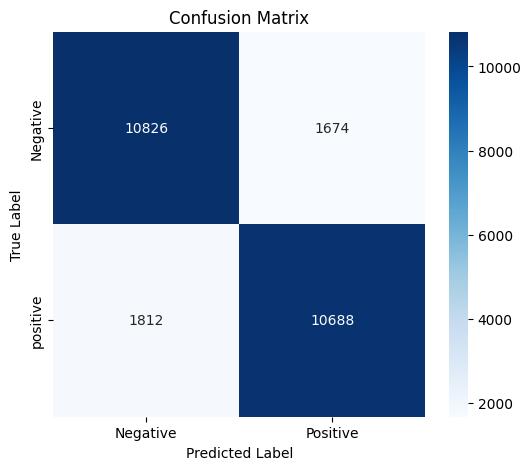

In [ ]:
# confusion matrix for the test data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

probs = model.predict(x_test, verbose=0)
y_pred = (probs > 0.5).astype(int).ravel()

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "positive"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **BiDirectional LSTM**

## **Sentiment Analysis**

In [ ]:
# importing libraries

import keras
from keras.datasets import imdb
from keras import layers
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# loading the data

max_vocab = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_vocab)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
# padding
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(25000, 200)
(25000, 200)


In [ ]:
# model building

embedding_dim = 64

model = keras.Sequential([
    keras.Input(shape=(maxlen,)),
    layers.Embedding(input_dim=max_vocab, output_dim=embedding_dim),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200, 256)       │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,002,113 (3.82 MB)

 Trainable params: 1,002,113 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    restore_best_weights=True
)

In [ ]:
# training the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size = 64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.7045 - loss: 0.5444 - val_accuracy: 0.8685 - val_loss: 0.3119
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.9073 - loss: 0.2424 - val_accuracy: 0.8671 - val_loss: 0.3160
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.9371 - loss: 0.1669 - val_accuracy: 0.8653 - val_loss: 0.3371
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 65ms/step - accuracy: 0.9572 - loss: 0.1204 - val_accuracy: 0.8656 - val_loss: 0.3904


* We can observe that the model performance increased on test data nearly 86%
* Also the model is overfitting, so the overfitting reducing techniques can be applied

In [ ]:
# evalating test score on test set

test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.8685
Test Loss: 0.3119


Predictions by the LSTM model

In [ ]:
# on test sample

sample = 87
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Prediction for 87th text: Positive
Origin al text label: Positive


In [ ]:
sample = 98
pred = model.predict(x_test[sample].reshape(1, -1))[0][0]

print(f"Prediction for {sample}th text: {'Negative' if pred <= 0.5 else 'Positive'}")
print(f"Origin al text label: {'Negative' if y_test[sample] <= 0.5 else 'Positive'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction for 98th text: Negative
Origin al text label: Negative


In [ ]:
# predictions

word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3


def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]  # start token
    for word in tokens:
        encoded.append(word_index.get(word, 2))  # use <UNK> if not found
    return encoded

text = "Very Bad Movie"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Review: Very Bad Movie
Predicted probability: 0.88278455
Sentiment: Positive


In [ ]:
text = "Good movie"
encoded = encode_text(text)
padded = pad_sequences([encoded], maxlen=maxlen, padding="pre")

pred = model.predict(padded)[0][0]
print("Review:", text)
print("Predicted probability:", pred)
print("Sentiment:", "Positive" if pred > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Review: Good movie
Predicted probability: 0.95174855
Sentiment: Positive


Got Wrong Prediction

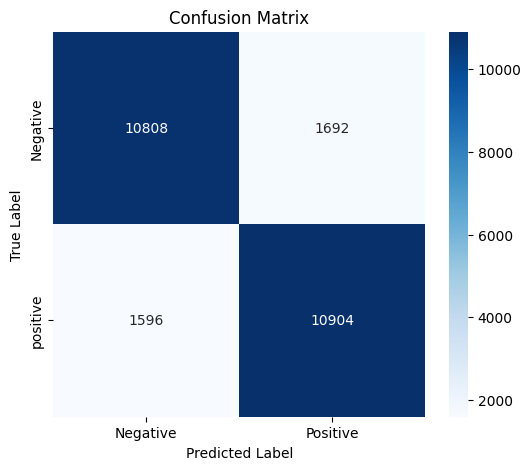

In [ ]:
# confusion matrix for the test data

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

probs = model.predict(x_test, verbose=0)
y_pred = (probs > 0.5).astype(int).ravel()

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "positive"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()